# Milliken Moment Diagram Analysis

Importing necessary libraries

In [148]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append("../..")
sys.path.append("..")
sys.path.append(".")
from helpers.labellines import *

Import generated points & filter garbage points

In [149]:
df = pd.read_csv("MMM.csv")
tires = ["front_left", "front_right", "rear_left", "rear_right"]
df = df[(df["roll"]*180/np.pi < 3) & (df["yaw_acceleration"] < 100)]
for tire in tires:
    x = df[f"{tire}_tire_is_saturated"]
    df = df[(df[f"{tire}_tire_is_saturated"] == False) & (df[f"{tire}_tire_tire_centric_forces_2"] > 1) & (df[f"{tire}_tire_tire_centric_forces_2"] < 4000)]

MMD Plot (Note - this really doesnt work when you are sweeping velocities and torque requests)

Text(0.5, 1.0, 'Milliken Moment Method \n Blue -> Discrete Steered Angle (deg); Red -> Discrete Body Slip (deg)')

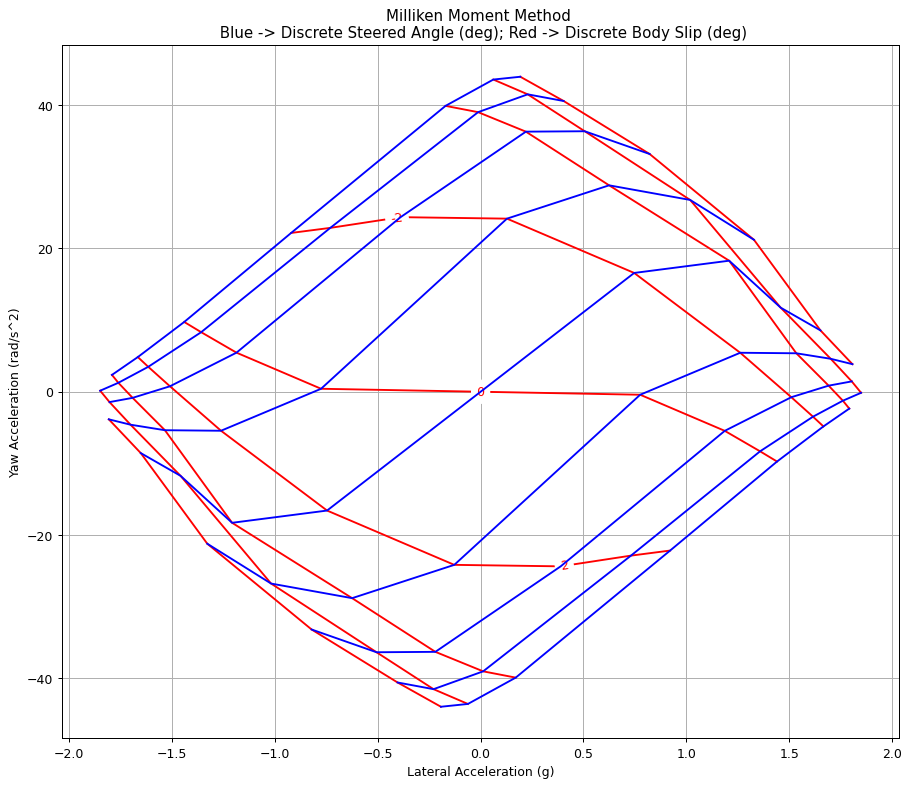

In [150]:
fig = plt.figure(figsize=(12, 10), dpi=90)
ax = fig.add_subplot(111)
mmm_df = df[abs(df["torque_request"]-0) < 0.01 ]
for x in mmm_df["body_slip"].unique():
    df2 = mmm_df[mmm_df["body_slip"] == x]    
    plt.plot(df2["vehicle_accelerations_NTB_1"]/9.81, df2["yaw_acceleration"], 'r', label = int(x*180/np.pi))
labelLines(plt.gca().get_lines(),zorder=2)

for x in mmm_df["steered_angle"].unique():
    df2 = mmm_df[(mmm_df["steered_angle"] == x)]
    plt.plot(df2["vehicle_accelerations_NTB_1"]/9.81, df2["yaw_acceleration"], 'b', label = int(x*180/np.pi))
#labelLines(plt.gca().get_lines(),zorder=2)

plt.grid()
plt.ylabel("Yaw Acceleration (rad/s^2)")
plt.xlabel("Lateral Acceleration (g)")
plt.title("Milliken Moment Method \n Blue -> Discrete Steered Angle (deg); Red -> Discrete Body Slip (deg)")

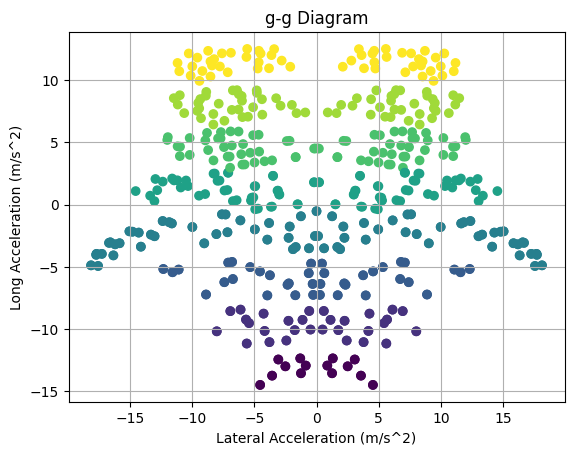

In [151]:
plt.scatter(df["vehicle_accelerations_NTB_1"], df["vehicle_accelerations_NTB_0"] , c=df["torque_request"],cmap="viridis")
plt.title("g-g Diagram")
plt.ylabel("Long Acceleration (m/s^2)")
plt.xlabel("Lateral Acceleration (m/s^2)")
plt.grid()

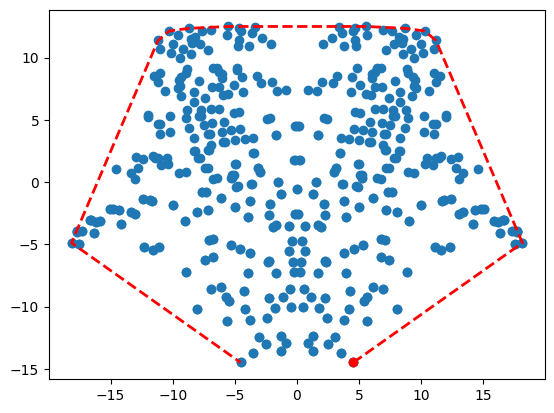

In [152]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
points = df[["vehicle_accelerations_NTB_1","vehicle_accelerations_NTB_0"]].to_numpy()
hull = ConvexHull(points)
x = np.transpose(points)
plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'r--', lw=2)
plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'ro')
plt.scatter(x[0], x[1])
plt.show()

new_df = df.iloc[hull.vertices]

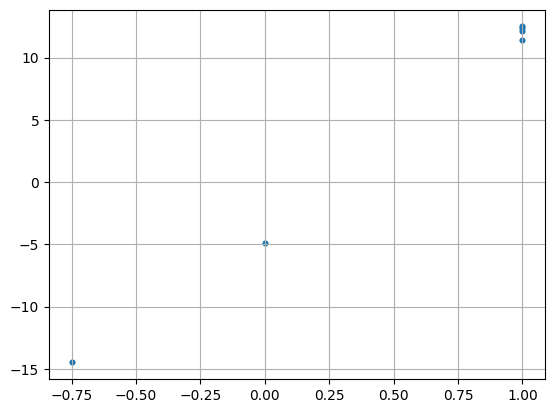

In [153]:
plt.scatter(new_df["torque_request"], new_df["vehicle_accelerations_NTB_0"], s=10)
plt.grid()

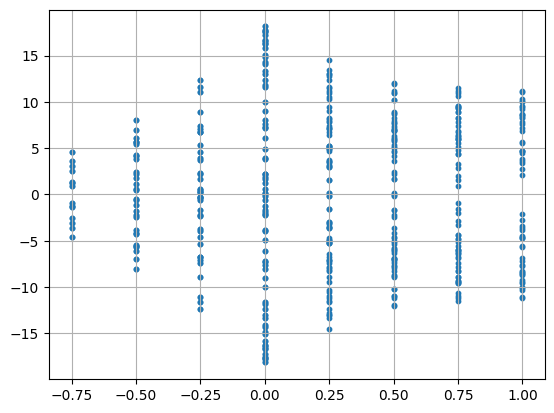

In [154]:
plt.scatter(df["torque_request"], df["vehicle_accelerations_NTB_1"], s=10)
plt.grid()

In [155]:
fig, axs = plt.subplots(1,3,figsize=(16, 6), dpi=80)
for tire in tires:
    axs[0].scatter(df["vehicle_accelerations_NTB_1"], df[f"{tire}_tire_tire_centric_forces_2"], label = tire)
axs[0].set_title("Normal Force vs Lateral Accel")
axs[0].grid()
axs[0].set_ylabel("Normal Force (N)")
axs[0].set_xlabel("Lateral Acceleration (m/s^2)")
axs[0].legend()

for tire in tires:
    axs[1].scatter(df["vehicle_accelerations_NTB_1"], df[f"{tire}_tire_tire_centric_forces_1"], label = tire)
axs[1].set_title("Lateral Force vs Lateral Accel")
axs[1].grid()
axs[1].set_ylabel("Lateral Force (N)")
axs[1].set_xlabel("Lateral Acceleration (m/s^2)")
axs[1].legend()

for tire in tires:
    axs[2].scatter(df["vehicle_accelerations_NTB_1"], df[f"{tire}_tire_tire_centric_forces_0"], label = tire)
axs[2].set_title("Long Force vs Lateral Accel")
axs[2].grid()
axs[2].set_ylabel("Long Force (N)")
axs[2].set_xlabel("Lateral Acceleration (m/s^2)")
axs[2].legend()

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(16, 6), dpi=80)

axs[0].scatter(df['vehicle_accelerations_NTB_1'], df['roll'] * (180 / np.pi))
axs[0].set_xlabel("Lateral Acceleration (m/s^2)")
axs[0].set_ylabel('Roll Angle (Degrees)')
axs[0].set_title("Roll Angle vs Lateral Accel")
axs[0].grid()

axs[1].scatter(df['vehicle_accelerations_NTB_1'], df['pitch'] * (180 / np.pi))
axs[1].set_xlabel("Lateral Acceleration (m/s^2)")
axs[1].set_ylabel('Pitch Angle (Degrees)')
axs[1].set_title("Pitch Angle vs Lateral Accel")
axs[1].grid()

axs[2].scatter(df['vehicle_accelerations_NTB_1'], df['heave']/.0254)
axs[2].set_xlabel("Lateral Acceleration (m/s^2)")
axs[2].set_ylabel('Heave (in)')
axs[2].set_title("Heave vs Lateral Accel")
axs[2].grid()

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(16, 6), dpi=80)

for tire in tires:
    axs[0].scatter(df["vehicle_accelerations_NTB_1"], df[f"{tire}_tire_f_roll"], label = tire)
axs[0].set_title("Roll Spring - Normal Force vs Lateral Accel")
axs[0].grid()
axs[0].set_ylabel("Normal Force Roll (N)")
axs[0].set_xlabel("Lateral Acceleration (m/s^2)")
axs[0].legend()

for tire in tires:
    axs[1].scatter(df["vehicle_accelerations_NTB_1"], df[f"{tire}_tire_f_heave"], label = tire)
axs[1].set_title("Heave Spring- Normal Force vs Lateral Accel")
axs[1].grid()
axs[1].set_ylabel("Heave Normal Force (N)")
axs[1].set_xlabel("Lateral Acceleration (m/s^2)")
axs[1].legend()

for tire in tires:
    axs[2].scatter(df["vehicle_accelerations_NTB_1"], df[f"{tire}_tire_f_pitch"], label = tire)
axs[2].set_title("Pitch Spring - Normal Force vs Lateral Accel")
axs[2].grid()
axs[2].set_ylabel("Pitch Normal Force (N)")
axs[2].set_xlabel("Lateral Acceleration (m/s^2)")
axs[2].legend()

In [ ]:
fig, axs = plt.subplots(1,4,figsize=(16, 6), dpi=80)

axs[0].scatter(df['vehicle_accelerations_NTB_1'], df['rear_right_tire_slip_angle'] * (180 / np.pi), label='Rear Right')
axs[0].scatter(df['vehicle_accelerations_NTB_1'], df['rear_left_tire_slip_angle'] * (180 / np.pi), label='Rear Left')
axs[0].scatter(df['vehicle_accelerations_NTB_1'], df['front_right_tire_slip_angle'] * (180 / np.pi), label='Front Right')
axs[0].scatter(df['vehicle_accelerations_NTB_1'], df['front_left_tire_slip_angle'] * (180 / np.pi), label='Front Left')
axs[0].legend()
axs[0].set_xlabel("Lateral Acceleration (m/s^2)")
axs[0].set_ylabel('Wheel Slip Angle (Degrees)')
axs[0].set_title("Slip Angle vs Lateral Accel")
axs[0].grid()

axs[1].scatter(df['vehicle_accelerations_NTB_1'], df['rear_right_tire_inclination_angle'] * (180 / np.pi), label='Rear Right')
axs[1].scatter(df['vehicle_accelerations_NTB_1'], df['rear_left_tire_inclination_angle'] * (180 / np.pi), label='Rear Left')
axs[1].scatter(df['vehicle_accelerations_NTB_1'], df['front_right_tire_inclination_angle'] * (180 / np.pi), label='Front Right')
axs[1].scatter(df['vehicle_accelerations_NTB_1'], df['front_left_tire_inclination_angle'] * (180 / np.pi), label='Front Left')
axs[1].legend()
axs[1].set_xlabel("Lateral Acceleration (m/s^2)")
axs[1].set_ylabel('Wheel Inclination Angle (Degrees)')
axs[1].set_title("IA Angle vs Lateral Accel")
axs[1].grid()

axs[2].scatter(df['vehicle_accelerations_NTB_1'], df['rear_right_tire_velocity_0'], label='Rear Right')
axs[2].scatter(df['vehicle_accelerations_NTB_1'], df['rear_left_tire_velocity_0'], label='Rear Left')
axs[2].scatter(df['vehicle_accelerations_NTB_1'], df['front_right_tire_velocity_0'], label='Front Right')
axs[2].scatter(df['vehicle_accelerations_NTB_1'], df['front_left_tire_velocity_0'], label='Front Left')
axs[2].legend()
axs[2].set_xlabel("Lateral Acceleration (m/s^2)")
axs[2].set_ylabel('Tire Velocity (m/s)')
axs[2].set_title("Tire Velocity vs Lateral Accel")
axs[2].grid()

axs[3].scatter(df['vehicle_accelerations_NTB_1'], df['rear_right_slip_ratio'], label='Rear Right')
axs[3].scatter(df['vehicle_accelerations_NTB_1'], df['rear_left_slip_ratio'], label='Rear Left')
axs[3].scatter(df['vehicle_accelerations_NTB_1'], df['front_right_slip_ratio'], label='Front Right')
axs[3].scatter(df['vehicle_accelerations_NTB_1'], df['front_left_slip_ratio'], label='Front Left')
axs[3].legend()
axs[3].set_xlabel("Lateral Acceleration (m/s^2)")
axs[3].set_ylabel('Tire Slip Ratio (%)')
axs[3].set_title("Tire Slip Ratio vs Lateral Accel")
axs[3].grid()

In [ ]:
temp_df = df[abs(df["vehicle_turn_radius"]) < 1000]
plt.scatter(temp_df["vehicle_accelerations_NTB_1"],temp_df["vehicle_turn_radius"])
plt.grid()
plt.title("Turn Radius vs Lateral Accel (constant velocity)")

In [ ]:
for x in mmm_df["steered_angle"].unique():
    if True:#x == 0:
        df2 = mmm_df[(mmm_df["steered_angle"] == x)]
        plt.plot(df2["body_slip"] * 180/math.pi, df2["vehicle_yaw_moment"]/9.81)
plt.xlim([0, 20])
plt.title("Stability Index - Yaw Moment vs Body Slip (Steered Angle sweep)")
plt.ylabel("Yaw Moment (Nm)")
plt.xlabel("Body Slip (degrees)")
plt.grid(True)
plt.show()

In [ ]:
import magic_moment_method.vehicle_params as vehicle_params
import magic_moment_method.state_solver as state_solver
vehicle = state_solver.Vehicle(vehicle_params.EasyDriver())
slip_angles = np.linspace(-30, 30, 1000)
s = vehicle.suspension
for normal_force in np.linspace(10, 2000, 10):
    output_force = [vehicle.suspension._Suspension__tires.front_right.lateral_pacejka(0, normal_force, y/180*np.pi) for y in slip_angles]
    plt.plot(slip_angles, output_force)
plt.grid()
plt.title("Front Tire - Lateral Fit")

In [ ]:
slip_angles = np.linspace(-30, 30, 1000)
for normal_force in np.linspace(10, 2000, 10):
    output_force = [vehicle.suspension._Suspension__tires.rear_right.lateral_pacejka(0, normal_force, y/180*np.pi) for y in slip_angles]
    plt.plot(slip_angles, output_force)

In [ ]:
#temp_df = df[abs(df["vehicle_turn_radius"]) < 1000]
plt.scatter(df["vehicle_accelerations_NTB_1"],df["front_right_tire_disp"])
plt.scatter(df["vehicle_accelerations_NTB_1"],df["front_left_tire_disp"])
plt.scatter(df["vehicle_accelerations_NTB_1"],df["rear_right_tire_disp"])
plt.scatter(df["vehicle_accelerations_NTB_1"],df["rear_left_tire_disp"])
plt.grid()

In [ ]:
plt.scatter(df["vehicle_accelerations_NTB_1"],df["aero_forces_0"], label = "drag")
plt.scatter(df["vehicle_accelerations_NTB_1"],df["aero_forces_1"], label = "sideforce")
plt.scatter(df["vehicle_accelerations_NTB_1"],df["aero_forces_2"], label = "downforce")
plt.legend()
plt.grid()
plt.ylabel("Force (N)")
plt.xlabel("Lateral Acceleration (m/s^2)")

In [ ]:
plt.scatter(df["body_slip"]*180/np.pi,df["aero_forces_1"], label = "sideforce")
plt.grid()
plt.ylabel("Side Force (N)")
plt.xlabel("Body Slip (degs)")